In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [11]:
dataset = pd.read_csv("/content/data.csv",sep=";", header=0)
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('"', '')
dataset.isnull().sum()

marital_status                                    0
application_mode                                  0
application_order                                 0
course                                            0
daytime/evening_attendance                        0
previous_qualification                            0
previous_qualification_(grade)                    0
nacionality                                       0
mother's_qualification                            0
father's_qualification                            0
mother's_occupation                               0
father's_occupation                               0
admission_grade                                   0
displaced                                         0
educational_special_needs                         0
debtor                                            0
tuition_fees_up_to_date                           0
gender                                            0
scholarship_holder                                0
age_at_enrol

## ENCODING CATEGORICAL VARIABLE

In [12]:
from sklearn.preprocessing import LabelEncoder
target_column=dataset["target"]
dataset["target"].unique()
class_labels = ["Dropout", "Graduate", "Enrolled"]

label_encoder = LabelEncoder()
label_encoder.fit(class_labels)
encoded_target = label_encoder.transform(target_column)

target_column = encoded_target

## HANDLING MISSING VALUES

In [13]:
missing_values = dataset.isnull().sum()

if missing_values.any():
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


# SCALING

In [14]:
X = dataset.iloc[:,0:-1]
y = dataset['target']
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.29482875, -0.09547022,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       [-0.29482875, -0.20986898, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.01066035,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       ...,
       [-0.29482875, -1.01066035, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.01066035, -0.55406775, ..., -0.81325289,
        -1.46687097, -1.37551124],
       [-0.29482875, -0.4958659 , -0.55406775, ...,  0.42569541,
         1.7879738 , -0.74987207]])

# DEFINING SAMPLES & FUNCTION

In [15]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel Value', 'Best C Value', 'Best Gamma Value'])
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=100)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

# OPTIMISATION & VISUALISATION

   Sample  Best Accuracy Best Kernel Value  Best C Value  Best Gamma Value
0       1           0.50           sigmoid          6.24              3.20
1       2           0.48               rbf          0.78              3.69
2       3           0.51           sigmoid          0.97              7.61
3       4           0.53              poly          1.76              8.28
4       5           0.48               rbf          1.81              8.44
5       6           0.49           sigmoid          6.22              4.08
6       7           0.54            linear          7.67              0.51
7       8           0.51               rbf          6.81              1.08
8       9           0.48               rbf          4.76              6.18
9      10           0.47           sigmoid          5.61              8.76


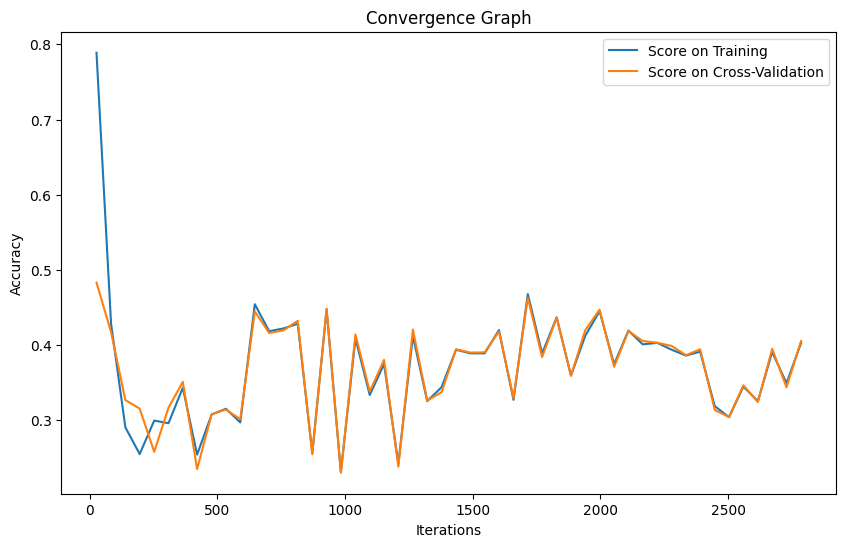

In [16]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]
print(result)
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel Value'].iloc[result['Best Accuracy'].idxmax()],
                                                        C=result['Best C Value'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Gamma Value'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 100), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score on Training')
plt.plot(train_sizes, test_mean, label='Score on Cross-Validation')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()